#Prepration

In [ ]:
!pip install causalml

     |████████████████████████████████| 245kB 3.4MB/s 
     |████████████████████████████████| 20.1MB 1.4MB/s 
     |████████████████████████████████| 327kB 45.4MB/s 
     |████████████████████████████████| 1.8MB 22.5MB/s 
     |████████████████████████████████| 634kB 45.6MB/s 
  Created wheel for causalml: filename=causalml-0.10.0-cp37-cp37m-linux_x86_64.whl size=493672 sha256=24b7a26751aa80b4d4bd33586dfd7bd7e9f3d3d67ef229a48b058db2763bc408
  Stored in directory: /root/.cache/pip/wheels/81/7f/44/c9d5ecf03f0d950f53302a5eab1c76bec07bcd5868753e22bf
  Created wheel for shap: filename=shap-0.37.0-cp37-cp37m-linux_x86_64.whl size=465037 sha256=5ef7687607589a7c19c86ef7665f3d6c328e13ef436e26c93f24b8947e884616
  Stored in directory: /root/.cache/pip/wheels/df/ad/b0/aa7815ec68850d66551ef618095eccb962c8f6022f1d3dd989
Successfully built causalml shap
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.18.5 which is incompatible.
ERROR: datascience 0.10.6 has requirement

In [ ]:
!pip install -U scikit-fuzzy
!git clone https://github.com/cyrus1123/FCEVAET.git
%cd FCEVAET
!unzip pyro-dev.zip
%cd pyro-dev
!python setup.py install
import pyro
import pyro.distributions as dist
from pyro import poutine
from pyro.infer import SVI, Trace_ELBO
from pyro.infer.util import torch_item
from pyro.nn import PyroModule
from pyro.optim import ClippedAdam
from pyro.util import torch_isnan
!git clone https://github.com/joseffaghihi/Causal-probabilistic-fuzzy-logic.git
%cd Causal-probabilistic-fuzzy-logic
import pandas as pd
from source.utils import Score
from source.Fuzzy import Fuzzy
from sklearn.model_selection import train_test_split

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import tensorflow as tf
from __future__ import absolute_import, division, print_function
import sys
import matplotlib.pyplot as plt
import logging
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import torch

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error as mse
from scipy.stats import entropy
import warnings
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)
from causalml.inference.meta import BaseXRegressor, BaseRRegressor, BaseSRegressor, BaseTRegressor
from causalml.propensity import ElasticNetPropensityModel
from causalml.metrics import *
from causalml.dataset import simulate_hidden_confounder

from pyro.contrib.cevae import CEVAE as CEVAEModel

from causalml.inference.meta.utils import convert_pd_to_np

pyro_logger = logging.getLogger("pyro")
pyro_logger.setLevel(logging.DEBUG)
if pyro_logger.handlers:
    pyro_logger.handlers[0].setLevel(logging.DEBUG)

     |████████████████████████████████| 1.0MB 5.0MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp37-none-any.whl size=894069 sha256=4d4fd930910ff86b281c3a16f42fe919bff4ebbfa3e92fddc2125058c58c61d8
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy
Cloning into 'FCEVAET'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
/content/FCEVAET
Archive:  pyro-dev.zip
   creating: pyro-dev/
  inflating: pyro-dev/.codecov.yml   
  inflating: pyro-dev/.coveragerc    
  inflating: pyro-dev/.gitattributes  
   creating: pyro-dev/.github/
  inflating: pyro-dev/.github/issue_template.md  
  inflating: pyro-dev/.gitignore     
  inflating: pyro-dev/.readthedocs.yml  
  inflating: pyro-dev/.travis.yml    
  inflating: 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Fuzzification then appling UBER CEVAE. High y_factual

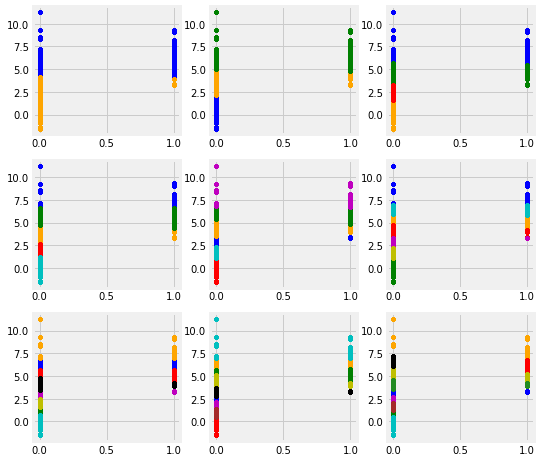

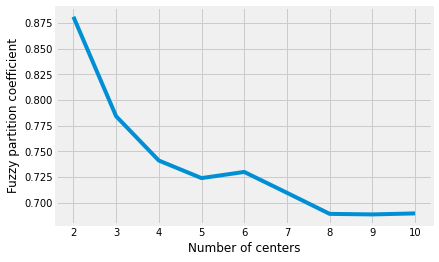

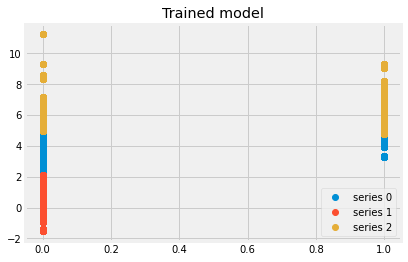

In [ ]:
#Youssef main block 
df= pd.read_csv('https://raw.githubusercontent.com/AMLab-Amsterdam/CEVAE/master/datasets/IHDP/csv/ihdp_npci_1.csv', header = None)
df.dataframeName = 'data'
cols =  ["treatment", "y_factual", "y_cfactual", "mu0", "mu1"] + [i for i in range(25)]
df.columns = cols
df = pd.concat([df]*100, ignore_index=True)
#precising variables type
binfeats = [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
contfeats = [i for i in range(25) if i not in binfeats]
perm = binfeats + contfeats
df = df.reset_index(drop=True)
X = df[perm].values
treatment = df['treatment'].values
y = df['y_factual'].values
y_cf = df['y_cfactual'].values
tau = df.apply(lambda y: y['y_factual'] - y['y_cfactual'] if y['treatment']==1
               else y['y_cfactual'] - y['y_factual'],
               axis=1)
mu_0 = df['mu0'].values
mu_1 = df['mu1'].values

# train and test
itr, ite = train_test_split(np.arange(X.shape[0]), test_size=0.2, random_state=1)
X_train, treatment_train, y_train, y_cf_train, tau_train, mu_0_train, mu_1_train = X[itr], treatment[itr], y[itr], y_cf[itr], tau[itr], mu_0[itr], mu_1[itr]
X_val, treatment_val, y_val, y_cf_val, tau_val, mu_0_val, mu_1_val = X[ite], treatment[ite], y[ite], y_cf[ite], tau[ite], mu_0[ite], mu_1[ite]

m=min(len(y_val),len(y_train))

test=Fuzzy()
new=test.fuzzify(df,[1,2],0,1)

In [ ]:
df1=new.copy()
df1_high=df1.drop(['y_factual_low', 'y_factual_average', 'y_cfactual_low', 'y_cfactual_average'], axis=1 )
cols =  ["treatment", "y_factual", "y_cfactual", "mu0", "mu1"] + [i for i in range(25)]
df1_high.columns=cols
df1_high['y_factual']=df1_high['y_factual']*10
df1_high['y_cfactual']=df1_high['y_cfactual']*10


INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [ ]:
#Youssef main block 
df= pd.read_csv('https://raw.githubusercontent.com/AMLab-Amsterdam/CEVAE/master/datasets/IHDP/csv/ihdp_npci_1.csv', header = None)
df.dataframeName = 'data'
cols =  ["treatment", "y_factual", "y_cfactual", "mu0", "mu1"] + [i for i in range(25)]
df.columns = cols
df = pd.concat([df]*100, ignore_index=True)

In [ ]:
df2=df.copy()
df2['y_factual']=df2['y_factual']*df1['y_factual_high']
df2['y_cfactual']=df2['y_cfactual']*df1['y_cfactual_high']

In [ ]:
df_high=df2.copy()

In [ ]:
X = df_high[perm].values
treatment = df_high['treatment'].values
y = df_high['y_factual'].values
y_cf = df_high['y_cfactual'].values
tau = df_high.apply(lambda y: y['y_factual'] - y['y_cfactual'] if y['treatment']==1
               else y['y_cfactual'] - y['y_factual'],
               axis=1).reset_index()
tau=tau[0]               
mu_0 = df['mu0'].values
mu_1 = df['mu1'].values

# train and test
itr, ite = train_test_split(np.arange(X.shape[0]), test_size=0.2, random_state=1)
X_train, treatment_train, y_train, y_cf_train, tau_train, mu_0_train, mu_1_train = X[itr], treatment[itr], y[itr], y_cf[itr], tau[itr], mu_0[itr], mu_1[itr]
X_val, treatment_val, y_val, y_cf_val, tau_val, mu_0_val, mu_1_val = X[ite], treatment[ite], y[ite], y_cf[ite], tau[ite], mu_0[ite], mu_1[ite]


m=min(len(y_val),len(y_train))


# model settings
outcome_dist = "normal"
latent_dim = 20
hidden_dim = 300
num_epochs = 10
batch_size = 1000
learning_rate = 0.001
learning_rate_decay = 0.01
num_layers =2

In [ ]:
class CEVAE:
    def __init__(self, outcome_dist="studentt", latent_dim=20, hidden_dim=200, num_epochs=50, num_layers=3,
                 batch_size=100, learning_rate=1e-3, learning_rate_decay=0.1, num_samples=1000, weight_decay=1e-4):
        """
        Initializes CEVAE.
            Args:
                outcome_dist (str): Outcome distribution as one of: "bernoulli" , "exponential", "laplace", "normal",
                                    and "studentt"
                latent_dim (int) : Dimension of the latent variable
                hidden_dim (int) : Dimension of hidden layers of fully connected networks
                num_epochs (int): Number of training epochs
                num_layers (int): Number of hidden layers in fully connected networks
                batch_size (int): Batch size
                learning_rate (int): Learning rate
                learning_rate_decay (float/int): Learning rate decay over all epochs; the per-step decay rate will
                                                 depend on batch size and number of epochs such that the initial
                                                 learning rate will be learning_rate and the
                                                 final learning rate will be learning_rate * learning_rate_decay
                num_samples (int) : Number of samples to calculate ITE
                weight_decay (float) : Weight decay
        """
        self.outcome_dist = outcome_dist
        self.latent_dim = latent_dim
        self.hidden_dim = hidden_dim
        self.num_epochs = num_epochs
        self.num_layers = num_layers
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.learning_rate_decay = learning_rate_decay
        self.num_samples = num_samples
        self.weight_decay = weight_decay

    def fit(self, X, treatment, y, p=None):
        """
        Fits CEVAE.
        Args:
            X (np.matrix or np.array or pd.Dataframe): a feature matrix
            treatment (np.array or pd.Series): a treatment vector
            y (np.array or pd.Series): an outcome vector
        """
        X, treatment, y = convert_pd_to_np(X, treatment, y)

        self.cevae = CEVAEModel(outcome_dist=self.outcome_dist,
                           feature_dim=X.shape[-1],
                           latent_dim=self.latent_dim,
                           hidden_dim=self.hidden_dim,
                           num_layers=self.num_layers)

        self.cevae.fit(x=torch.tensor(X, dtype=torch.float),
                       t=torch.tensor(treatment, dtype=torch.float),
                       y=torch.tensor(y, dtype=torch.float),
                       num_epochs=self.num_epochs,
                       batch_size=self.batch_size,
                       learning_rate=self.learning_rate,
                       learning_rate_decay=self.learning_rate_decay,
                       weight_decay=self.weight_decay)

    def predict(self, X, treatment=None, y=None, p=None):
        """
        Calls predict on fitted DragonNet.
        Args:
            X (np.matrix or np.array or pd.Dataframe): a feature matrix
        Returns:
            (np.ndarray): Predictions of treatment effects.
        """
        return self.cevae.ite(torch.tensor(X, dtype=torch.float),
                              num_samples=self.num_samples,
                              batch_size=self.batch_size).cpu().numpy()

    def fit_predict(self, X, treatment, y, p=None):
        """
        Fits the CEVAE model and then predicts.
        Args:
            X (np.matrix or np.array or pd.Dataframe): a feature matrix
            treatment (np.array or pd.Series): a treatment vector
            y (np.array or pd.Series): an outcome vector
        Returns:
            (np.ndarray): Predictions of treatment effects.
        """
        self.fit(X, treatment, y)
        return self.predict(X)

# from  model import CEVAE
cevae_model = CEVAE(outcome_dist=outcome_dist,
              latent_dim=latent_dim,
              hidden_dim=hidden_dim,
              num_epochs=num_epochs,
              batch_size=batch_size,
              learning_rate=learning_rate,
              learning_rate_decay=learning_rate_decay,
              num_layers=num_layers)        

# fit
losses = cevae_model.fit(X=torch.tensor(X_train, dtype=torch.float),
                   treatment=torch.tensor(treatment_train, dtype=torch.float),
                   y=torch.tensor(y_train, dtype=torch.float))

INFO 	 Training with 60 minibatches per epoch
DEBUG 	 step     0 loss = 88.8325
DEBUG 	 step   100 loss = 24.1272
DEBUG 	 step   200 loss = 18.2505
DEBUG 	 step   300 loss = 15.7591
DEBUG 	 step   400 loss = 14.0279
DEBUG 	 step   500 loss = 13.7327


In [ ]:
#train 
ite_train = cevae_model.predict(X_train)
ite_val = cevae_model.predict(X_val)

INFO 	 Evaluating 60 minibatches
DEBUG 	 batch ate = 4.09664
DEBUG 	 batch ate = 4.10841
DEBUG 	 batch ate = 4.10859
DEBUG 	 batch ate = 4.11159
DEBUG 	 batch ate = 4.0947
DEBUG 	 batch ate = 4.13964
DEBUG 	 batch ate = 4.10782
DEBUG 	 batch ate = 4.13349
DEBUG 	 batch ate = 4.12967
DEBUG 	 batch ate = 4.12941
DEBUG 	 batch ate = 4.09266
DEBUG 	 batch ate = 4.06981
DEBUG 	 batch ate = 4.14351
DEBUG 	 batch ate = 4.12225
DEBUG 	 batch ate = 4.11988
DEBUG 	 batch ate = 4.11906
DEBUG 	 batch ate = 4.07114
DEBUG 	 batch ate = 4.06218
DEBUG 	 batch ate = 4.09638
DEBUG 	 batch ate = 4.17737
DEBUG 	 batch ate = 4.17578
DEBUG 	 batch ate = 4.11231
DEBUG 	 batch ate = 4.16929
DEBUG 	 batch ate = 4.07542
DEBUG 	 batch ate = 4.09579
DEBUG 	 batch ate = 4.08695
DEBUG 	 batch ate = 4.08641
DEBUG 	 batch ate = 4.13974
DEBUG 	 batch ate = 4.13293
DEBUG 	 batch ate = 4.14196
DEBUG 	 batch ate = 4.04222
DEBUG 	 batch ate = 4.1244
DEBUG 	 batch ate = 4.10983
DEBUG 	 batch ate = 4.06529
DEBUG 	 batch ate

In [ ]:
ate_train = ite_train.mean()
ate_val = ite_val.mean()
print(ate_train, ate_val)

4.1093464 4.113066


#My_Dev

In [ ]:
#Youssef main block 
df= pd.read_csv('https://raw.githubusercontent.com/AMLab-Amsterdam/CEVAE/master/datasets/IHDP/csv/ihdp_npci_1.csv', header = None)
df.dataframeName = 'data'
cols =  ["treatment", "y_factual", "y_cfactual", "mu0", "mu1"] + [i for i in range(25)]
df.columns = cols
df = pd.concat([df]*100, ignore_index=True)

In [ ]:
ddf1=new
ddf1_low=ddf1.drop(['y_factual_average', 'y_factual_high', 'y_cfactual_average', 'y_cfactual_high'], axis=1 )
cols =  ["treatment", "y_factual", "y_cfactual", "mu0", "mu1"] + [i for i in range(25)]
ddf1_low.columns=cols
ddf1_low['y_factual']=ddf1_low['y_factual']*10
ddf1_low['y_cfactual']=ddf1_low['y_cfactual']*10



ddf2=new
ddf2_medium=ddf2.drop(['y_factual_low', 'y_factual_high', 'y_cfactual_low', 'y_cfactual_high'], axis=1 )
cols =  ["treatment", "y_factual", "y_cfactual", "mu0", "mu1"] + [i for i in range(25)]
ddf2_medium.columns=cols
ddf2_medium['y_factual']=ddf2_medium['y_factual']*10
ddf2_medium['y_cfactual']=ddf2_medium['y_cfactual']*10

ddf3=new
ddf3_high=ddf3.drop(['y_factual_low', 'y_factual_average', 'y_cfactual_low', 'y_cfactual_average'], axis=1 )
cols =  ["treatment", "y_factual", "y_cfactual", "mu0", "mu1"] + [i for i in range(25)]
ddf3_high.columns=cols
ddf3_high['y_factual']=ddf3_high['y_factual']*10
ddf3_high['y_cfactual']=ddf3_high['y_cfactual']*10


In [ ]:
ypm=[ddf1_low['y_factual'].mean(), ddf2_medium['y_factual'].mean(), ddf3_high['y_factual'].mean()]
ycpm=[ddf1_low['y_cfactual'].mean(), ddf2_medium['y_cfactual'].mean(), ddf3_high['y_cfactual'].mean()]
print(ypm)
print(ycpm)


[3.0374304282618327, 5.215813389558481, 0.3838391383229899]
[0.626199056752154, 5.11259919081242, 2.096599906716878]


In [ ]:
ym=[df['y_factual'].mean(), df['y_factual'].mean(), df['y_factual'].mean()]
ycm=[df['y_cfactual'].mean(), df['y_cfactual'].mean(), df['y_cfactual'].mean()]
print(ym)
print(ycm)


[3.1595375238574683, 3.1595375238574683, 3.1595375238574683]
[5.6961065503097705, 5.6961065503097705, 5.6961065503097705]


In [ ]:
np.array(ym)/np.array(ypm)

array([1.04020079, 0.60576123, 8.23141053])

In [ ]:
np.array(ycm)/np.array(ycpm)

array([9.09631928, 1.11413125, 2.71683049])

In [ ]:
y-l*1.04020079
yc-l*9.09631928
y-m*0.60576123
yc-m*1.11413125
y-h*8.23141053
yc-h*2.71683049

In [ ]:
min (1, 1-A+B)

In [ ]:
A, B=0.2, 0.2
print(min(1, 1-A+B))
print(max(1-A, B))

1
0.8


In [ ]:
A=0.2
B=A**2
print(min(1, 1-A+B))
print(max(1-A, B))